In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go

In [7]:
data = load_breast_cancer()
X = data.data
y = data.target

In [13]:
X_pca = StandardScaler().fit(X).transform(X)
pca = PCA(n_components = 2)
X_pca = pca.fit(X_pca).transform(X_pca)

(569, 2)

In [12]:
nmf = NMF(n_components = 2)
X_nmf = nmf.fit(X).transform(X)

(569, 2)

In [16]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_pca, y).score(X_pca, y)

0.9543057996485061

In [17]:
clf.fit(X_nmf, y).score(X_nmf, y)

0.945518453427065

In [21]:
fig = go.Figure()
fig.add_scatter(x = X_nmf[:, 0],
                y = X_nmf[:, 1], 
                mode = 'markers', 
                marker_color = y)

In [22]:
from sklearn.manifold import TSNE

In [28]:
tsne = TSNE(n_components = 3)
X_tsne = tsne.fit_transform(X)

In [29]:
clf.fit(X_tsne, y).score(X_tsne, y)

0.9437609841827768

In [31]:
fig = go.Figure()
fig.add_scatter3d(x = X_tsne[:, 0],
                y = X_tsne[:, 1], 
                z = X_tsne[:, 2],
                mode = 'markers', 
                marker_color = y, 
                marker_size = 2)

In [32]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [62]:
X, y = make_blobs(n_samples = 500, random_state = 170)
rng = np.random.RandomState(74)
trans = rng.normal(size = (2, 2)) #Transformation Matrix
X_ = np.dot(X, trans)
kmeans = KMeans(n_clusters = 3)
y_predict = kmeans.fit(X_).predict(X_)
fig = go.Figure()
fig.add_scatter(x = X_[:, 0],
                y = X_[:, 1], 
                mode = 'markers', 
                marker_color = y)
 

In [38]:
import mglearn
from sklearn.cluster import AgglomerativeClustering as AC

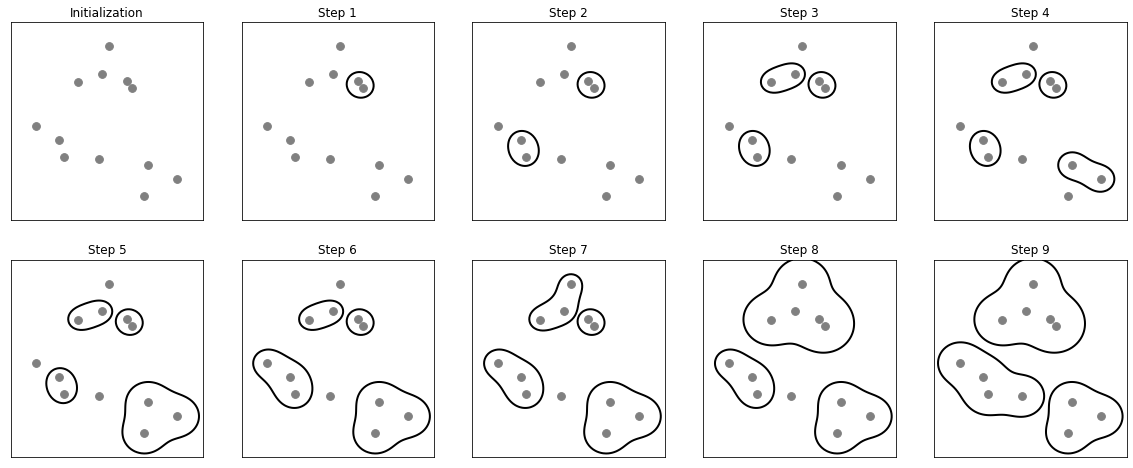

In [42]:
mglearn.plots.plot_agglomerative_algorithm()

In [55]:
ac = AC(n_clusters = 3, 
        linkage = 'complete')
ac.fit(X)
y_predict = ac.labels_

In [56]:
fig = go.Figure()
fig.add_scatter(x = X[:, 0],
                y = X[:, 1], 
                mode = 'markers', 
                marker_color = y_predict)

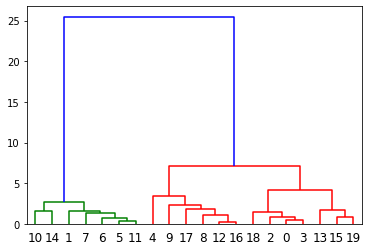

In [60]:
from scipy.cluster.hierarchy import ward, dendrogram
X, y =  make_blobs(n_samples = 20)
data = ward(X)
dendrogram(data)
fig = go.Figure()
fig.add_scatter(x = X[:, 0],
                y = X[:, 1], 
                mode = 'markers', 
                marker_color = y)

In [61]:
from sklearn.cluster import DBSCAN

In [72]:
#X, y = make_b
dbscan = DBSCAN(eps = 0.4, min_samples = 10).fit(X_)
y_predict = dbscan.labels_
fig = go.Figure()
fig.add_scatter(x = X_[:, 0],
                y = X_[:, 1], 
                mode = 'markers', 
                marker_color = y_predict)